In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

# Load dataframe

In [10]:
path_base = Path('/home/yhuang2/PROJs/LS4GAN/toygan_outdir/toy-adc/bc/transfer/bc-cyclegan-transfer-8x8/')
model_prefix = 'model_d(toyzero-precropped)_md(None)_mg(unet_128)'
df = pd.read_csv(path_base/f'{model_prefix}_wgen/history.csv')

df = pd.read_csv('~/PROJs/LS4GAN/toygan_outdir/toy-adc/vit/transfer_convdeconv/vit-cyclegan-transfer-convdeconv/model_d(toyzero-precropped)_md(None)_mg(vitconvdeconv)_3eac0d975f251653a731b602147f7ad2/history.csv')

# Preprocess

In [11]:
# combine generator loss:
def overall_gen_loss(df, l, p=.5):
    # l = lambda, p = phi
    df['overall_gen_loss'] = df['gen_ab'] + df['gen_ba'] + l * (df['cycle_a'] + df['cycle_b'])
    if 'idt_a' in df.columns:
        df['overall_gen_loss'] += p * l * (df['idt_a'] + df['idt_b'])
    
    df['disc_a_original'] = df['disc_a'] * 2 + df['gen_ba']
    df['disc_b_original'] = df['disc_b'] * 2 + df['gen_ab']
    df['disc_a_translated'] = -df['gen_ba']
    df['disc_b_translated'] = -df['gen_ab']
        

def epoch_select(df, epoch_min=None, epoch_max=None):
    if epoch_min is None:
        epoch_min = 0
    if epoch_max is None:
        epoch_max = df['epoch'].max()
            
    return df[ (df['epoch'] >= epoch_min) & (df['epoch'] <= epoch_max) ].copy(), epoch_min, epoch_max

In [12]:
l, p = 1, .5
overall_gen_loss(df, l, p)

epoch_min, epoch_max = 0, 50
df_sel, epoch_min, epoch_max = epoch_select(df, epoch_min, epoch_max)

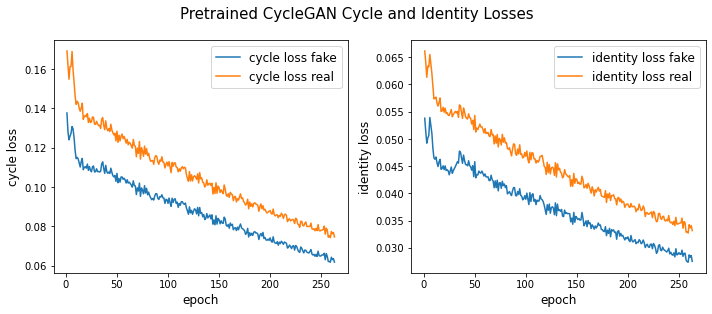

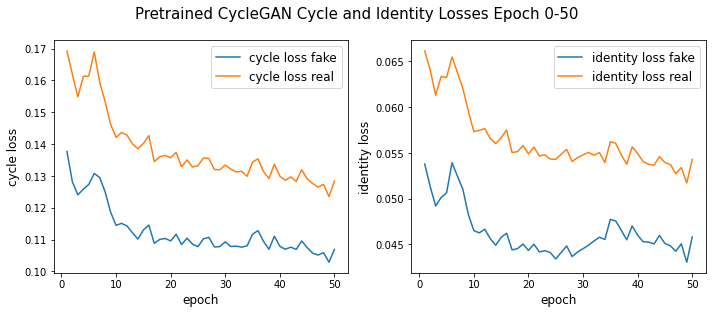

In [13]:
def plot_cycle_idt(df, figsize=(10, 4), title=None, save_fname=None):

    fig, axes = plt.subplots(1, 2, figsize=figsize)
    ax = axes[0]
    df.plot(x='epoch', y='cycle_a', ax=ax, label='cycle loss fake')
    df.plot(x='epoch', y='cycle_b', ax=ax, label='cycle loss real')
    ax.set_ylabel(f'cycle loss', fontsize=12)
    ax.set_xlabel(f'epoch', fontsize=12)
    ax.legend(fontsize=12)
    
    ax = axes[1]
    df.plot(x='epoch', y='idt_a', ax=ax, label='identity loss fake')
    df.plot(x='epoch', y='idt_b', ax=ax, label='identity loss real')
    ax.set_ylabel(f'identity loss', fontsize=12)
    ax.set_xlabel(f'epoch', fontsize=12)
    ax.legend(fontsize=12)
    
    fig.tight_layout()
    if title:
        fig.suptitle(title, fontsize=15, y=1.08)
    if save_fname:
        fig.savefig(save_fname, bbox_inches='tight', dpi=300, transparent=True)
    
title = 'Pretrained CycleGAN Cycle and Identity Losses'
save_fname = os.path.join('results', '_'.join(title.split()).lower() + '.png')
plot_cycle_idt(df, title=title, save_fname=save_fname)

title = 'Pretrained CycleGAN Cycle and Identity Losses Epoch 0-50'
save_fname = os.path.join('results', '_'.join(title.split()).lower() + '.png')
plot_cycle_idt(df_sel, title=title, save_fname=save_fname)

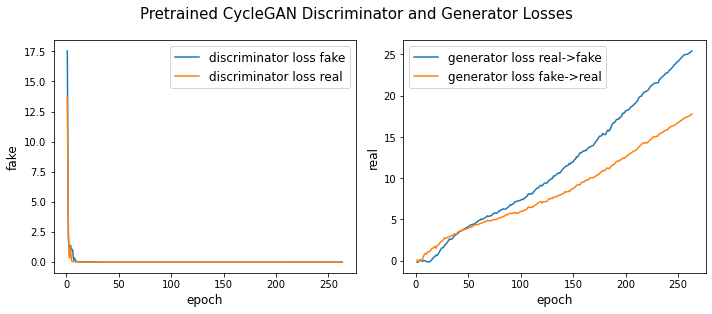

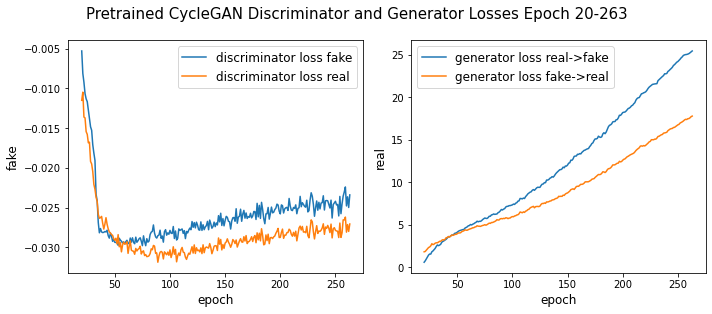

In [14]:
def plot_disc_gen(df, figsize=(10, 4), title=None, save_fname=None):

    fig, axes = plt.subplots(1, 2, figsize=figsize)
    ax = axes[0]
    df.plot(x='epoch', y='disc_a', ax=ax, label='discriminator loss fake')
    df.plot(x='epoch', y='disc_b', ax=ax, label='discriminator loss real')
   
    ax.set_ylabel(f'fake', fontsize=12)
    ax.set_xlabel(f'epoch', fontsize=12)
    # ax.set_yscale('symlog')
    ax.legend(fontsize=12)
    
    ax = axes[1]
    df.plot(x='epoch', y='gen_ba', ax=ax, label='generator loss real->fake')
    df.plot(x='epoch', y='gen_ab', ax=ax, label='generator loss fake->real')
    ax.set_ylabel(f'real', fontsize=12)
    ax.set_xlabel(f'epoch', fontsize=12)
    # ax.set_yscale('symlog')
    ax.legend(fontsize=12)
    
    fig.tight_layout()
    if title:
        fig.suptitle(title, fontsize=15, y=1.08)
    if save_fname:
        fig.savefig(save_fname, bbox_inches='tight', dpi=300, transparent=True)
    
title = 'Pretrained CycleGAN Discriminator and Generator Losses'
save_fname = os.path.join('results', '_'.join(title.split()).lower() + '.png')
plot_disc_gen(df, title=title, save_fname=save_fname)

epoch_min, epoch_max = 20, None
df_sel, epoch_min, epoch_max = epoch_select(df, epoch_min, epoch_max)
title = f'Pretrained CycleGAN Discriminator and Generator Losses Epoch {epoch_min}-{epoch_max}'
save_fname = os.path.join('results', '_'.join(title.split()).lower() + '.png')
plot_disc_gen(df_sel, title=title, save_fname=save_fname)

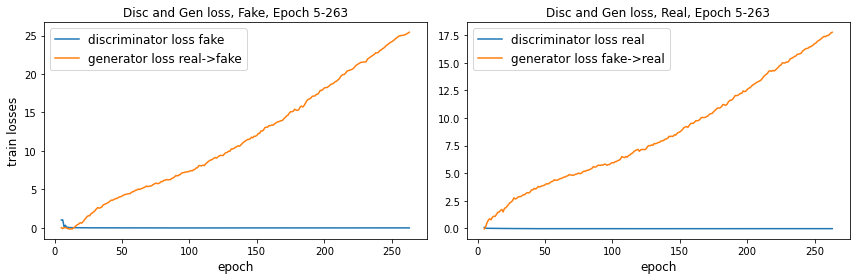

In [15]:
epoch_min, epoch_max = 5, None
df_sel, epoch_min, epoch_max = epoch_select(df, epoch_min, epoch_max)

figsize = (12, 4)
fig, axes = plt.subplots(1, 2, figsize=figsize)
ax = axes[0]
df_sel.plot(x='epoch', y='disc_a', ax=ax, label='discriminator loss fake')
df_sel.plot(x='epoch', y='gen_ba', ax=ax, label='generator loss real->fake')
ax.set_ylabel(f'train losses', fontsize=12)
ax.set_xlabel(f'epoch', fontsize=12)
# ax.set_yscale('symlog')
ax.legend(fontsize=12)
title = f'Disc and Gen loss, Fake, Epoch {epoch_min}-{epoch_max}'
ax.set_title(title)

ax = axes[1]
df_sel.plot(x='epoch', y='disc_b', ax=ax, label='discriminator loss real')
df_sel.plot(x='epoch', y='gen_ab', ax=ax, label='generator loss fake->real')
# ax.set_ylabel(f'real', fontsize=12)
ax.set_xlabel(f'epoch', fontsize=12)
# ax.set_yscale('symlog')
ax.legend(fontsize=12)

title = f'Disc and Gen loss, Real, Epoch {epoch_min}-{epoch_max}'
ax.set_title(title)
fig.tight_layout()

save_fname = os.path.join('results', '_'.join(title.split()).lower() + '.png')
fig.savefig(save_fname, bbox_inches='tight', dpi=300, transparent=True)

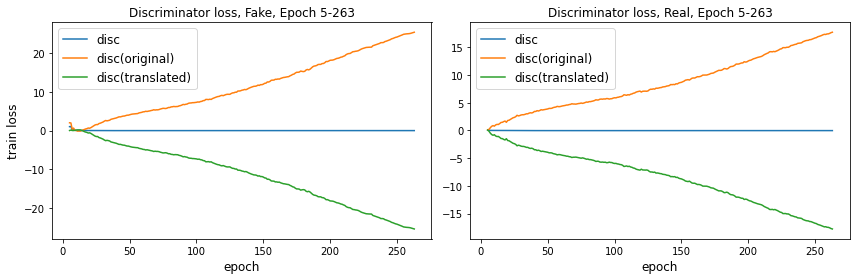

In [16]:
epoch_min, epoch_max = 5, None
df_sel, epoch_min, epoch_max = epoch_select(df, epoch_min, epoch_max)

figsize = (12, 4)
fig, axes = plt.subplots(1, 2, figsize=figsize)
ax = axes[0]
df_sel.plot(x='epoch', y='disc_a', ax=ax, label='disc')
# df_sel.plot(x='epoch', y='gen_ba', ax=ax, label='generator loss real->fake')
df_sel.plot(x='epoch', y='disc_a_original', ax=ax, label='disc(original)')
df_sel.plot(x='epoch', y='disc_a_translated', ax=ax, label='disc(translated)')
ax.set_ylabel(f'train loss', fontsize=12)
ax.set_xlabel(f'epoch', fontsize=12)
# ax.set_yscale('symlog')
ax.legend(fontsize=12)
title = f'Discriminator loss, Fake, Epoch {epoch_min}-{epoch_max}'
ax.set_title(title)

ax = axes[1]
df_sel.plot(x='epoch', y='disc_b', ax=ax, label='disc')
# df_sel.plot(x='epoch', y='gen_ab', ax=ax, label='generator loss real->fake')
df_sel.plot(x='epoch', y='disc_b_original', ax=ax, label='disc(original)')
df_sel.plot(x='epoch', y='disc_b_translated', ax=ax, label='disc(translated)')
# ax.set_ylabel(f'train loss', fontsize=12)
ax.set_xlabel(f'epoch', fontsize=12)
# ax.set_yscale('symlog')
ax.legend(fontsize=12)
title = f'Discriminator loss, Real, Epoch {epoch_min}-{epoch_max}'
ax.set_title(title)
fig.tight_layout()

save_fname = os.path.join('results', '_'.join(title.split()).lower() + '.png')
fig.savefig(save_fname, bbox_inches='tight', dpi=300, transparent=True)

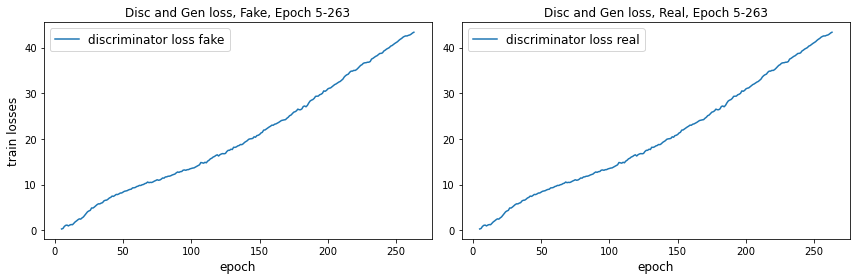

In [17]:
epoch_min, epoch_max = 5, None
df_sel, epoch_min, epoch_max = epoch_select(df, epoch_min, epoch_max)

figsize = (12, 4)
fig, axes = plt.subplots(1, 2, figsize=figsize)
ax = axes[0]
df_sel.plot(x='epoch', y='overall_gen_loss', ax=ax, label='discriminator loss fake')
ax.set_ylabel(f'train losses', fontsize=12)
ax.set_xlabel(f'epoch', fontsize=12)
# ax.set_yscale('symlog')
ax.legend(fontsize=12)
title = f'Disc and Gen loss, Fake, Epoch {epoch_min}-{epoch_max}'
ax.set_title(title)

ax = axes[1]
df_sel.plot(x='epoch', y='overall_gen_loss', ax=ax, label='discriminator loss real')

# ax.set_ylabel(f'real', fontsize=12)
ax.set_xlabel(f'epoch', fontsize=12)
# ax.set_yscale('symlog')
ax.legend(fontsize=12)

title = f'Disc and Gen loss, Real, Epoch {epoch_min}-{epoch_max}'
ax.set_title(title)
fig.tight_layout()

save_fname = os.path.join('results', '_'.join(title.split()).lower() + '.png')
# fig.savefig(save_fname, bbox_inches='tight', dpi=300, transparent=True)